<a href="https://colab.research.google.com/github/JFernando6321/computational-physics-projects/blob/main/Euler's_method.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<center>
    <img src="https://ecfm.usac.edu.gt/sites/default/files/2019-02/cintillo.png" width="1000" alt="ecfm logo">
</center>


##Euler's method ##


Author: Julio Fernando Vicente Maldonado
## Objectives

* Develop an algorithm for simulation of projectile trajectories
* Comparison of trajectories with and without air resistance
* Determination of the maximum range of the projectile
* Numerical verification of optimum launch angle without air resistance
* Optimization of launch angle with air resistance


## Develop an algorithm for simulation of projectile trajectories

Let's start by defining the function that solves the differential equations.
We will add a conditional to take into account the air resistance.

Where we will take the following values to solve the system of equations:

* $\frac{B_2}{m} = 0.00004 m^{-1}$

* $g= 9.8 m/s^2 $
* $v_0 = 700 $
* Exit angle $\theta = \frac{\pi}{6} $
* The number of values to calculate: $N= 10^5$
* $\Delta t= 0.01s $

In [9]:
###############################################################################
#################### euler's function for the projectile ######################
###############################################################################

import numpy as np

def proyectil(B2_m, g, v0, theta, N, dt, resistencia=True ):

    theta = np.radians(theta)

# Initial conditions
    x, y = 0, 0
    vx = v0 * np.cos(theta)  #
    vy = v0 * np.sin(theta)  #

    X = [x]
    Y = [y]

    for _ in range(N):
        if resistencia:
            # Equations with resistance
            v = np.sqrt(vx**2 + vy**2)
            ax = -B2_m * v * vx
            ay = -g - B2_m * v * vy
        else:
            # Equations without resistance
            ax = 0
            ay = -g
        vx += ax * dt
        vy += ay * dt
        x += vx * dt
        y += vy * dt

        X.append(x)
        Y.append(y)


# Check if the projectile has hit the ground
        if y <= 0:
            break

    return X, Y


## Comparison of trajectories with and without air resistance

Now let's calculate the trajectory of the projectile with and without air resistance and then compare them.

In [13]:
#####System of equations for both cases
X_without_resistence, Y_without_resistence = proyectil(0, g, v0, theta, N, dt, resistencia=False)
X_with_resistence, Y_with_resistence = proyectil(B2_m, g, v0, theta, N, dt, resistencia=True)


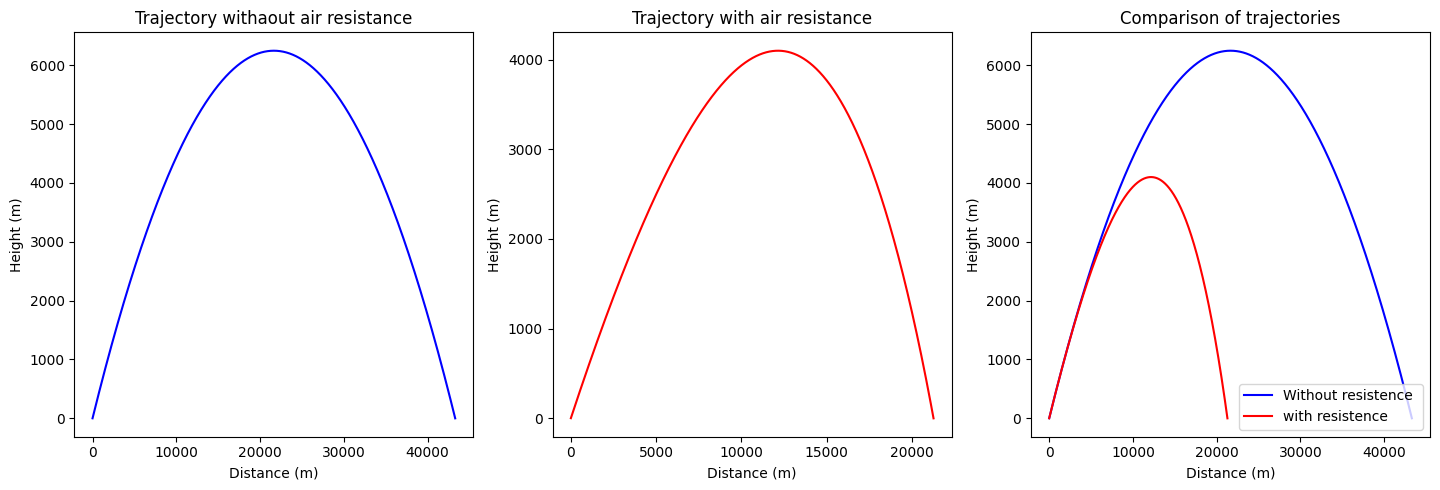

In [21]:
import matplotlib.pyplot as plt


# Parameters
B2_m = 0.00004  #   m^{-1}
g = 9.8         #   m/s^2
v0 = 700        #   m/s
theta = np.pi / 6
N = 100000      # number of values to calculate
dt = 0.01
assert 0 <= theta <= np.pi / 2, """
The angle must be between 0 and π/2 radians.
"""

###############################################################################
################################ Grapichs #####################################
###############################################################################

plt.figure(figsize=(14.5, 5))

#Grapichs without resistence
plt.subplot(1, 3, 1)
plt.plot(X_without_resistence, Y_without_resistence, 'b')
plt.title('Trajectory withaout air resistance')
plt.xlabel('Distance (m)')
plt.ylabel('Height (m)')

# Grapichs with resistence
plt.subplot(1, 3, 2)
plt.plot(X_with_resistence, Y_with_resistence, 'r')
plt.title('Trajectory with air resistance')
plt.xlabel('Distance (m)')
plt.ylabel('Height (m)')

# Gráfico comparativo
plt.subplot(1, 3, 3)
plt.plot(X_without_resistence, Y_without_resistence, 'b', label='Without resistence ')
plt.plot(X_with_resistence, Y_with_resistence, 'r', label='with resistence')
plt.title('Comparison of trajectories')
plt.xlabel('Distance (m)')
plt.ylabel('Height (m)')
plt.legend()

plt.tight_layout()
plt.show()



We can see that it has shortened both the distance traveled on the x-axis and significantly decreased the height of the trajectory when air is present, this at very long flight times since the difference cannot be very noticeable at the beginning of the trajectory because the air resistance is very small.

## Determination of the maximum range of the projectile

let's modify the projectile function to give us the maximum range when the projectile is at ground level, that is, when the axis $y= 0$.



In [22]:
###############################################################################
#########3 Modify the function for calculating the maximum range ##############
###############################################################################

def proyectil(B2_m, g, v0, theta, N, dt, resistencia=True):
    vx = v0 * np.cos(theta)
    vy = v0 * np.sin(theta)
    x, y = 0.0, 0.0
    X, Y = [x], [y]

    for i in range(N):
        if y <= 0 and i > 0:  # Stop if y <= 0 after the first step
            break

        if resistencia:
            v = np.sqrt(vx**2 + vy**2)
            ax = -B2_m * v * vx
            ay = -g - B2_m * v * vy
        else:
            ax = 0
            ay = -g

        vx += ax * dt
        vy += ay * dt
        x += vx * dt
        y += vy * dt

        X.append(x)
        Y.append(y)

    maximum_range = max(X)
    return X, Y, maximum_range


We create instances for this new function for each case, with air resistance and without air resistance.

In [25]:
range_without_resistence = proyectil(0, g, v0, theta, N, dt, resistencia=False)
range_with_resistence = proyectil(B2_m, g, v0, theta, N, dt, resistencia=True)

# Show maximum ranges
# Access the third element of the tuple (maximum_range) for formatting
print(f"Maximum range without air resistance: {range_without_resistence[2]:.2f} m")
print(f"Maximum range with air resistance: {range_with_resistence[2]:.2f} m")

Maximum range without air resistance: 43296.07 m
Maximum range with air resistance: 21278.03 m


## Numerical verification of optimum launch angle without air resistance

Theoretically for the ideal cases, where there is no air resistance the maximum range is reached at $45°$, let's make a sweep from $0$ to $\frac{\pi}{2}$ with a graph of range versus launch angle, to verify what heights are reached for each angle.

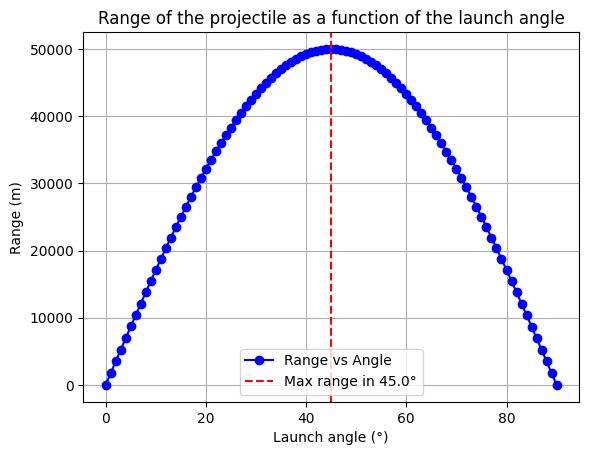

---------------------------------
---------------------------------
The angle that maximizes the range is: 45.0° con a range of 50007.30 m


In [37]:
# Function calculating the range without air resistance for a given angle

def range_without_resistance(theta):
    theta_rad = np.radians(theta)
    vx = v0 * np.cos(theta_rad)
    vy = v0 * np.sin(theta_rad)
    x = 0
    y = 0

    while y >= 0:  # Continue the simulation until the projectile hits the ground.
        x += vx * dt
        y += vy * dt
        vy -= g * dt

    return x

# We vary the angles from 0 to 90°
angles = np.linspace(0, 90,91)  #in steps of 1°
alcances = []

# Calculate the range for each angle
for theta in angles:
    alcance = range_without_resistance(theta)
    alcances.append(alcance)

# Finding the angle that maximizes range
angle_max_alcance = angles[np.argmax(alcances)]
max_alcance = max(alcances)

# Plot of range as a function of angle
plt.plot(angles, alcances, 'bo-', label='Range vs Angle')
plt.axvline(x=angle_max_alcance, color='r', linestyle='--', label=f'Max range in {angle_max_alcance:.1f}°')
plt.title('Range of the projectile as a function of the launch angle')
plt.xlabel('Launch angle (°)')
plt.ylabel('Range (m)')
plt.legend()
plt.show()

print("---------------------------------")
print("---------------------------------")
print(f"The angle that maximizes the range is: {angle_max_alcance:.1f}° with a range of {max_alcance:.2f} m")


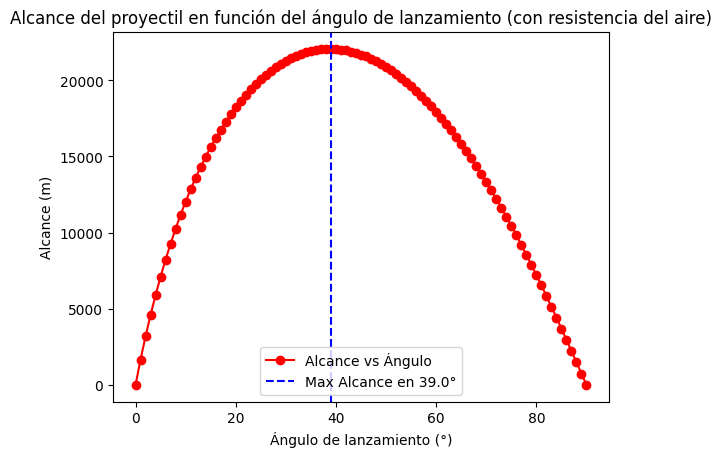

---------------------------------
---------------------------------
The angle that maximizes the range is: 39.0° with a range of 22062.00 m


In [43]:
##Función que calcula el alcance con resistencia del aire para un ángulo dado##
def range_with_resistence(theta):
    theta_rad = np.radians(theta)
    vx = v0 * np.cos(theta_rad)
    vy = v0 * np.sin(theta_rad)
    x = 0
    y = 0

    while y >= 0:
        v = np.sqrt(vx**2 + vy**2)
        ax = -B2_m * v * vx
        ay = -g - B2_m * v * vy
        vx += ax * dt
        vy += ay * dt
        x += vx * dt
        y += vy * dt

    return x

# We vary the angles from 0 to 90°
angles = np.linspace(0, 90,91)  #in steps of 1°
alcances = []

# Calculate the range for each angle
for theta in angles:
    alcance = range_with_resistence(theta)
    alcances.append(alcance)

# Finding the angle that maximizes range
angle_max_alcance = angles[np.argmax(alcances)]
max_alcance = max(alcances)

# Graficar el alcance en función del ángulo
plt.plot(angles, alcances, 'ro-', label='Alcance vs Ángulo')
plt.axvline(x=angle_max_alcance, color='b', linestyle='--', label=f'Max Alcance en {angle_max_alcance:.1f}°')
plt.title('Alcance del proyectil en función del ángulo de lanzamiento (con resistencia del aire)')
plt.xlabel('Ángulo de lanzamiento (°)')
plt.ylabel('Alcance (m)')
plt.legend()
plt.show()
print("---------------------------------")
print("---------------------------------")
print(f"The angle that maximizes the range is: {angle_max_alcance:.1f}° with a range of {max_alcance:.2f} m")
